**Office Supplies Data** (P2- OfficeSupplies Data.csv) – 20 marks

**1. Sales Analysis:**
   - What are the total sales for each product category?
   - Which product category has the highest sales?
   - Identify the top 10 best-selling products.

**2.  Customer Analysis:**
   - Who are the top 10 customers by sales?
   - What is the total number of unique customers?
   - Analyze customer purchase frequency.

**3.  Time Series Analysis:**
   - What are the monthly sales trends over the past year?
   - Identify any seasonal patterns in the sales data.

**4.  Geographical Analysis:**
   - Which regions generate the most sales?
   - What are the sales trends across different regions?

**5.  Profit Analysis:**
   - What is the total profit for each product category?
   - Identify the top 10 most profitable products.


**Given the office supplies data.We need to perform the above mentioned tasks.**

Importing necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/P2- OfficeSupplies Data.csv')

In [3]:
data.head()

,OrderDate,Region,Rep,Item,Units,Unit Price
0,04-Jul-14,East,Richard,Pen Set,62,4.99
1,12-Jul-14,East,Nick,Binder,29,1.99
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49
3,29-Jul-14,East,Susan,Binder,81,19.99
4,07-Aug-14,Central,Matthew,Pen Set,42,23.95


In [4]:
data.columns

Index(['OrderDate', 'Region', 'Rep', 'Item', 'Units', 'Unit Price'], dtype='object')

In [5]:
df = pd.DataFrame(data)

In [6]:
df.head()

,OrderDate,Region,Rep,Item,Units,Unit Price
0,04-Jul-14,East,Richard,Pen Set,62,4.99
1,12-Jul-14,East,Nick,Binder,29,1.99
2,21-Jul-14,Central,Morgan,Pen Set,55,12.49
3,29-Jul-14,East,Susan,Binder,81,19.99
4,07-Aug-14,Central,Matthew,Pen Set,42,23.95


In [7]:
len(df)

43

# **1. SALES ANALYSIS**

**a) The total sales for each product category.**

Total Sales column can be made by multiplying the values of number of units column and Price per Unit

In [40]:
# Calculating total sales for each product category
df['Total Sales']=df['Units']*df['Unit Price']


In [9]:
df['Total Sales'].head()

0     309.38
1      57.71
2     686.95
3    1619.19
4    1005.90
Name: Total Sales, dtype: float64

Using groupby() method inorder to group the data by product category which is 'Item' column

In [10]:
total_sales_per_category = df.groupby('Item')['Total Sales'].sum()

print(total_sales_per_category)

Item
Binder     9577.65
Desk       1700.00
Pen        2045.22
Pen Set    4169.87
Pencil     2135.14
Name: Total Sales, dtype: float64


**b) Product Category with highest sales**

In [11]:
max_sales_category = total_sales_per_category.idxmax()
max_sales_category

'Binder'

In [12]:
max_sales_value = max(total_sales_per_category)
max_sales_value

9577.65

In [13]:
print("The product category with highest sales is ",max_sales_category,"with a sale value of ",max_sales_value)

The product category with highest sales is  Binder with a sale value of  9577.65


**c) Identify the top 10 best-selling products**

In [14]:
top_ten_best_selling = total_sales_per_category.sort_values(ascending=False).head(10)
top_ten_best_selling

Item
Binder     9577.65
Pen Set    4169.87
Pencil     2135.14
Pen        2045.22
Desk       1700.00
Name: Total Sales, dtype: float64

Actually in the given dataset the number of unique products are only five in number . Hence the top two best selling products are Binder and Pen Set.

# **2.CUSTOMER ANALYSIS**

**a) Top ten customers by sales**

In [15]:
customers_wise_total_sales = df.groupby('Rep')['Total Sales'].sum()

In [16]:
customers_wise_total_sales

Rep
Alex       2812.19
Bill       1749.87
James      1283.61
Matthew    3109.44
Morgan     1387.77
Nick        536.75
Rachel      438.37
Richard    2363.04
Smith      1641.43
Susan      3102.30
Thomas     1203.11
Name: Total Sales, dtype: float64

In [17]:
top_ten_customers= customers_wise_total_sales.sort_values(ascending=False).head(10)
print("Top ten customers by sale are:")
top_ten_customers

Top ten customers by sale are:


Rep
Matthew    3109.44
Susan      3102.30
Alex       2812.19
Richard    2363.04
Bill       1749.87
Smith      1641.43
Morgan     1387.77
James      1283.61
Thomas     1203.11
Nick        536.75
Name: Total Sales, dtype: float64

**b) The total number of unique customers.**

Inorder to find out the number of unique customers we will be using unique() method.

In [18]:
unique_customers =df['Rep'].unique()
print("The total number of unique customers are",len(unique_customers))

The total number of unique customers are 11


**c) Analyzing customer purchase frequency**

In [19]:
purchase_frequency = df.groupby('Rep')['Total Sales'].count()
purchase_frequency

Rep
Alex       5
Bill       5
James      4
Matthew    4
Morgan     3
Nick       2
Rachel     4
Richard    8
Smith      3
Susan      3
Thomas     2
Name: Total Sales, dtype: int64

# **3.TIME SERIES ANALYSIS**

**a) Monthly sales trends over the past year**

In [20]:
df['OrderDate'].head()

0    04-Jul-14
1    12-Jul-14
2    21-Jul-14
3    29-Jul-14
4    07-Aug-14
Name: OrderDate, dtype: object

 **Pandas to_datetime()** method helps to **convert string Date time into Python Date time object.**

In [21]:
df['date']=pd.to_datetime(df['OrderDate'])
df['date'].head()

<ipython-input-21-923f1ade5370>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date']=pd.to_datetime(df['OrderDate'])


0   2014-07-04
1   2014-07-12
2   2014-07-21
3   2014-07-29
4   2014-08-07
Name: date, dtype: datetime64[ns]

In [22]:
# Extract month
df['Month'] = df['date'].dt.month_name()
df['Month'].head()

0      July
1      July
2      July
3      July
4    August
Name: Month, dtype: object

In [23]:
monthly_sales = df.groupby('Month')['Total Sales'].sum().sort_values(ascending=False)
monthly_sales

Month
December     3288.47
July         2673.23
February     2044.33
August       2005.55
October      1984.57
June         1613.50
January      1602.09
May          1300.35
April        1059.03
November      833.78
September     666.11
March         556.87
Name: Total Sales, dtype: float64

**b) Identifying seasonal patterns in sales data**

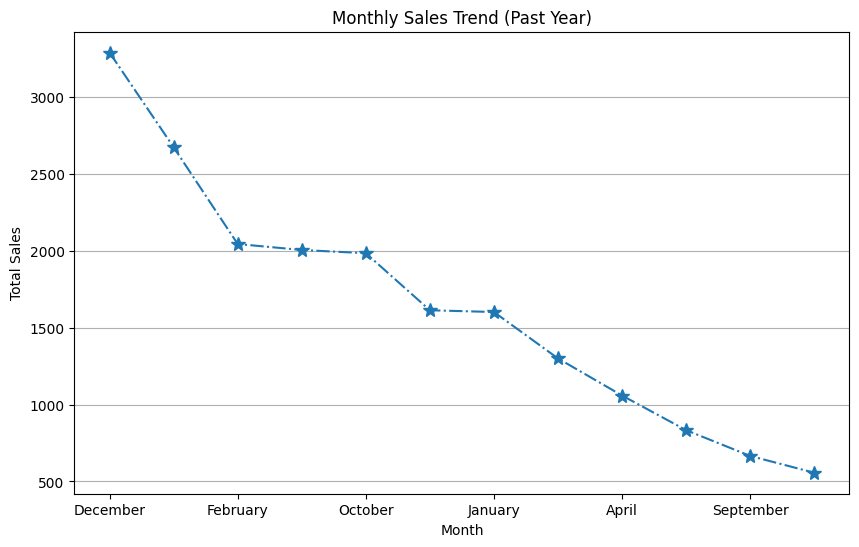

In [24]:
# Monthly Sales Trend Plot (Line chart)
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', marker='*', ms=10,linestyle='-.')
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.title("Monthly Sales Trend (Past Year)")
plt.grid(axis='y')
plt.show()

# **4. GEOGRAPHICAL ANALYSIS**


**a) Regions generating the most sales**

In [25]:
total_sales_per_region = df.groupby('Region')['Total Sales'].sum()
total_sales_per_region = total_sales_per_region.sort_values(ascending=False)

In [26]:
total_sales_per_region

Region
Central    11139.07
East        6002.09
West        2486.72
Name: Total Sales, dtype: float64

<Axes: title={'center': 'Total Sales Per Region'}, xlabel='Region'>

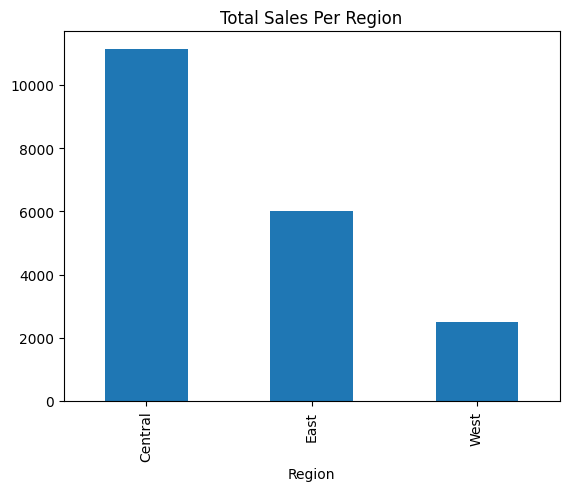

In [27]:
total_sales_per_region.plot(kind='bar', title='Total Sales Per Region')

In [28]:
print("region that was generating the most sales is ",total_sales_per_region.idxmax())

region that was generating the most sales is  Central


**b) The sales trends across different regions**

In [29]:
df['YearMonth'] = df['date'].dt.to_period('M')
df['YearMonth'].head()
print(df.columns)

Index(['OrderDate', 'Region', 'Rep', 'Item', 'Units', 'Unit Price',
       'Total Sales', 'date', 'Month', 'YearMonth'],
      dtype='object')


In [30]:
total_sales_per_region_month = df.groupby(['Region', 'YearMonth'])['Total Sales'].sum()
total_sales_per_region_month.head()

Region   YearMonth
Central  2014-07       686.95
         2014-08      1005.90
         2014-09       259.03
         2014-10       269.78
         2014-11       533.93
Name: Total Sales, dtype: float64

In [31]:
total_sales_per_region_month = df.groupby(['Region', 'YearMonth'])['Total Sales'].sum().unstack()
total_sales_per_region_month

YearMonth,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06
Region,,,,,,,,,,,,
Central,686.95,1005.90,259.03,269.78,533.93,2105.21,1413.04,2024.37,249.50,280.59,1236.67,1074.1
East,1986.28,174.65,255.84,575.36,299.85,1183.26,189.05,19.96,NaN,778.44,NaN,539.4
West,NaN,825.00,151.24,1139.43,NaN,NaN,NaN,NaN,307.37,NaN,63.68,NaN


In [32]:
total_sales_per_region_month = total_sales_per_region_month.T.reset_index()
print(total_sales_per_region_month)
total_sales_per_region_month['YearMonth'] = total_sales_per_region_month['YearMonth'].astype(str)
#total_sales_per_region_month

Region YearMonth  Central     East     West
0        2014-07   686.95  1986.28      NaN
1        2014-08  1005.90   174.65   825.00
2        2014-09   259.03   255.84   151.24
3        2014-10   269.78   575.36  1139.43
4        2014-11   533.93   299.85      NaN
5        2014-12  2105.21  1183.26      NaN
6        2015-01  1413.04   189.05      NaN
7        2015-02  2024.37    19.96      NaN
8        2015-03   249.50      NaN   307.37
9        2015-04   280.59   778.44      NaN
10       2015-05  1236.67      NaN    63.68
11       2015-06  1074.10   539.40      NaN


The melt function in pandas is used to unpivot a DataFrame from a wide format to a long format. In the context of your DataFrame, it will transform the columns representing regions into rows, making the DataFrame easier to analyze and plot.

In [33]:
# Melt the DataFrame for seaborn
df_melted = total_sales_per_region_month.melt(id_vars='YearMonth', var_name='Region', value_name='Total Sales')
df_melted.head()

,YearMonth,Region,Total Sales
0,2014-07,Central,686.95
1,2014-08,Central,1005.90
2,2014-09,Central,259.03
3,2014-10,Central,269.78
4,2014-11,Central,533.93


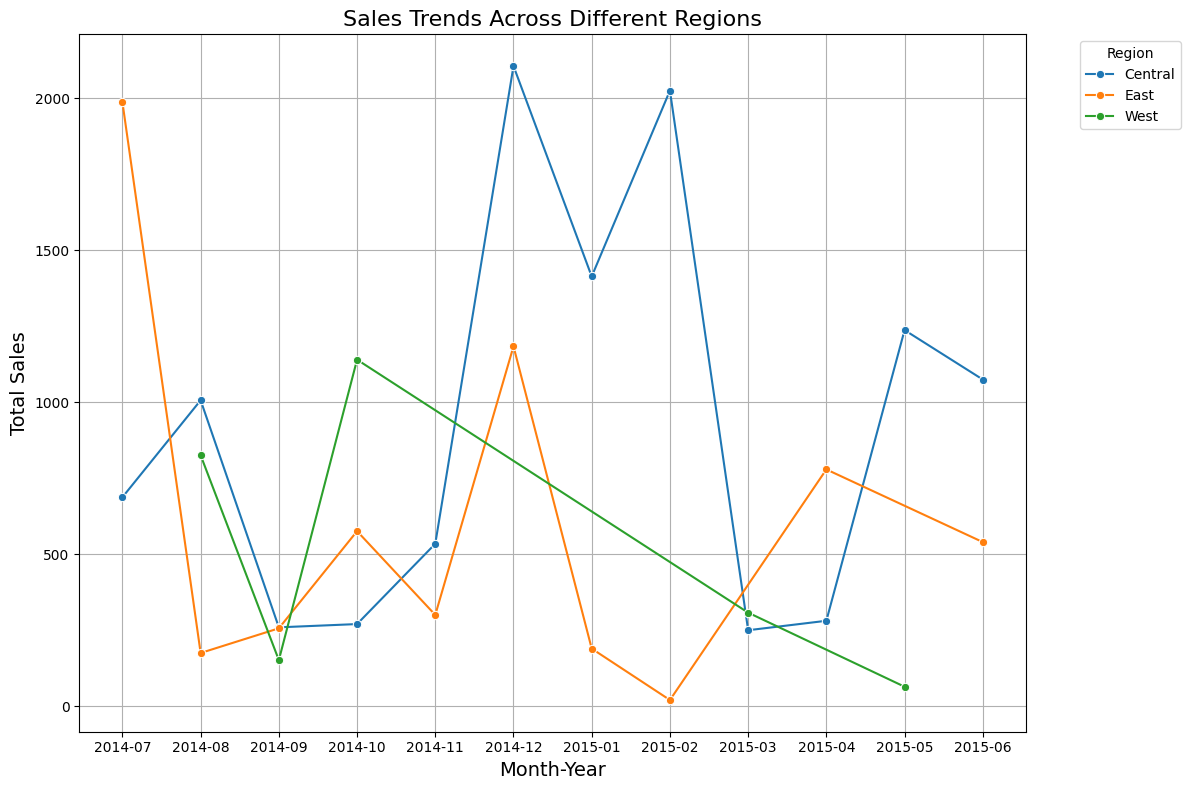

In [34]:
# Plotting the sales trends across different regions using seaborn
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_melted, x='YearMonth', y='Total Sales', hue='Region', marker='o')
plt.title('Sales Trends Across Different Regions', fontsize=16)
plt.xlabel('Month-Year', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# **5.  PROFIT ANALYSIS**

**a) The total profit for each product category**

In [35]:
df.columns

Index(['OrderDate', 'Region', 'Rep', 'Item', 'Units', 'Unit Price',
       'Total Sales', 'date', 'Month', 'YearMonth'],
      dtype='object')

In [36]:
total_sales_per_category = df.groupby('Item')['Total Sales'].sum()

# Assuming profit is the same as total sales in this context as there is no cost price field
total_profit_per_category = total_sales_per_category

print("Total profit for each product category :")
print(total_profit_per_category)

Total profit for each product category :
Item
Binder     9577.65
Desk       1700.00
Pen        2045.22
Pen Set    4169.87
Pencil     2135.14
Name: Total Sales, dtype: float64


In [37]:
print('max profit product is ',total_profit_per_category.idxmax())

max profit product is  Binder


**b) Identifying the top 10 most profitable products.**

In [38]:
top_ten_profitable_products = total_profit_per_category.sort_values(ascending=False).head(10)
top_ten_profitable_products

Item
Binder     9577.65
Pen Set    4169.87
Pencil     2135.14
Pen        2045.22
Desk       1700.00
Name: Total Sales, dtype: float64

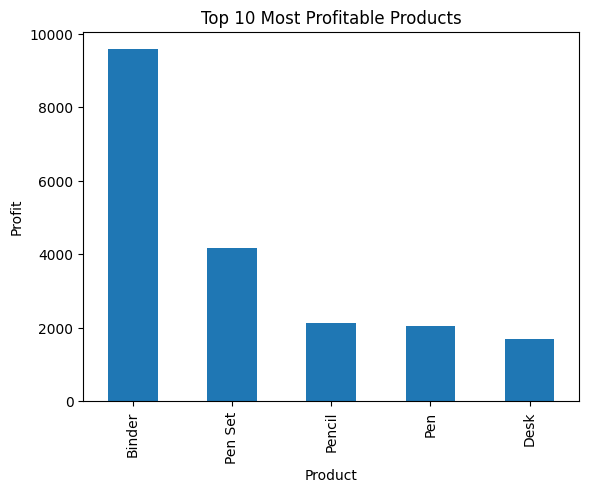

In [39]:
top_ten_profitable_products.plot(kind ='bar', title ='Top 10 Most Profitable Products')

plt.xlabel('Product')
plt.ylabel('Profit')
plt.show()